# **1. 라이브러리 및 데이터**
* 필요 라이브러리 선언

In [1]:
# feature extractoring and preprocessing data
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
import numpy as np
from scipy.signal import butter, lfilter, freqz, filtfilt
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 14, 6
from scipy import signal as sp
from scipy import signal

import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Reports
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

* 소음데이터 열기

In [28]:
sr = 16000
e_file1 = './붙임3. NOISY_INPUT_DB/airport/10dB/sp01_airport_sn10.wav'
# 10 seconds of each file
y1,sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=10)

In [ ]:
sr, data = sio.wavfile.read(e_file1)
# sr = sr*2
y1,sr = librosa.load(input, mono=True, sr=sr, offset=0, duration=10)

* 연 데이터 재생

In [29]:
from IPython.display import Audio, IFrame, display


#잡음 오디오
display(Audio(y1,rate=sr))


# **2.데이터 스펙트럼**
* 소음데이터의 소리크기 스펙트럼 확인

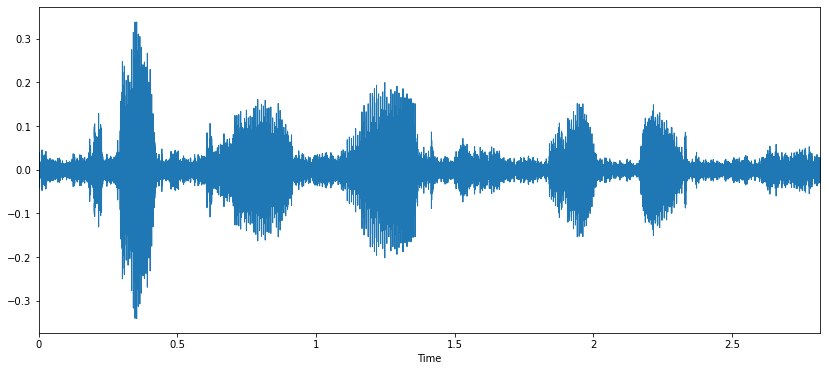

In [30]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');

* 소음데이터의 주파수대역 스펙트럼 확인

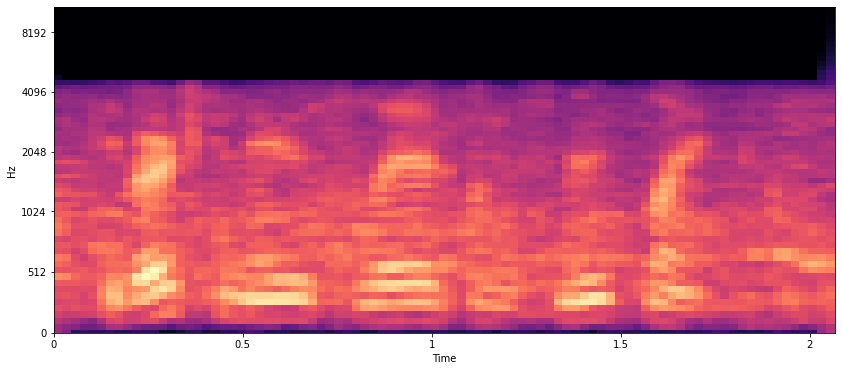

In [31]:
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis='time', y_axis='mel');

# **3.음성 필터링**
* 밴드패스필터 선언

In [32]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [33]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

* 위너필터 사용

In [34]:
yw1 = sp.wiener(y1, mysize=33)

* 밴드패스필터 사용

In [35]:
ywb1 = butter_bandpass_filter(yw1, 20, 1000, sr/2)

* 주파수대역에서 사람의 목소리 대역을 제외한 부분 제거(푸리에변환 이용)

In [36]:
ft = librosa.stft(ywb1)
ft[:20] /= 100
ft[500:] /= 100
ywbf1 = librosa.istft(ft)

* ann모델을 이용한 주파수대역에서의 필터설계 및 사용

In [37]:
import tensorflow.keras as keras
import tensorflow.keras
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

ft = librosa.stft(ywb1)

ft_t = np.transpose(np.abs(ft))
ft_t_in = np.copy(ft_t)
ft_t_in[:,20:500] = 0
ft_t_out = np.copy(ft_t)

data_size = len(ft_t[0])

layer_0_1 = keras.layers.Input(shape=(data_size,))
layer_1_1 = keras.layers.Dense(500, activation='relu')(layer_0_1)
layer_1_2 = keras.layers.Dropout(0.1)(layer_1_1)
layer_2_1 = keras.layers.Dense(500, activation='sigmoid')(layer_1_2)
layer_2_2 = keras.layers.Dropout(0.1)(layer_2_1)
layer_0_and_2 = keras.layers.Concatenate()([layer_0_1, layer_2_2])
layer_3_1 = keras.layers.Dense(500, activation='sigmoid')(layer_0_and_2)
layer_1_and_3 = keras.layers.Concatenate()([layer_1_2, layer_3_1])
layer_4_1 = keras.layers.Dense(500, activation='relu')(layer_1_and_3)
layer_2_and_4 = keras.layers.Concatenate()([layer_2_2, layer_4_1])
layer_5_1 = keras.layers.Dense(500, activation='relu')(layer_2_and_4)
layer_3_and_5 = keras.layers.Concatenate()([layer_3_1, layer_5_1])
layer_6_1 = keras.layers.Dense(500, activation='sigmoid')(layer_3_and_5)
layer_4_and_6 = keras.layers.Concatenate()([layer_4_1, layer_6_1])
layer_7_1 = keras.layers.Dense(500, activation='relu')(layer_4_and_6)
layer_5_and_7 = keras.layers.Concatenate()([layer_5_1, layer_7_1])
layer_8_1 = keras.layers.Dense(data_size, activation='relu')(layer_5_and_7)

filler = keras.models.Model(layer_0_1, layer_8_1)
filler.compile(optimizer='rmsprop', loss='logcosh')

filler.fit(ft_t_in, ft_t_out,
           epochs=50, batch_size=100,
           shuffle=True, verbose=0,
           validation_data=(ft_t_in, ft_t_out))

ft_t = np.transpose(np.abs(ft))
ft_t_in = np.copy(ft_t)
ft_t_in[:,20:500] = 0

ft_ann_pred = np.transpose(filler.predict(ft_t_in))

ft_ann = (np.abs(ft) - ft_ann_pred) * (ft / np.abs(ft))
ywba1 = librosa.istft(ft_ann)

* ann모델을 이용한 주파수대역에서의 필터설계 및 사용

In [38]:
import tensorflow.keras as keras
import tensorflow.keras
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

ft = librosa.stft(yw1)

ft_t = np.transpose(np.abs(ft))
ft_t_in = np.copy(ft_t)
ft_t_in[:,20:500] = 0
ft_t_out = np.copy(ft_t)

data_size = len(ft_t[0])

layer_0_1 = keras.layers.Input(shape=(data_size,))
layer_1_1 = keras.layers.Dense(500, activation='relu')(layer_0_1)
layer_1_2 = keras.layers.Dropout(0.1)(layer_1_1)
layer_2_1 = keras.layers.Dense(500, activation='sigmoid')(layer_1_2)
layer_2_2 = keras.layers.Dropout(0.1)(layer_2_1)
layer_0_and_2 = keras.layers.Concatenate()([layer_0_1, layer_2_2])
layer_3_1 = keras.layers.Dense(500, activation='sigmoid')(layer_0_and_2)
layer_1_and_3 = keras.layers.Concatenate()([layer_1_2, layer_3_1])
layer_4_1 = keras.layers.Dense(500, activation='relu')(layer_1_and_3)
layer_2_and_4 = keras.layers.Concatenate()([layer_2_2, layer_4_1])
layer_5_1 = keras.layers.Dense(500, activation='relu')(layer_2_and_4)
layer_3_and_5 = keras.layers.Concatenate()([layer_3_1, layer_5_1])
layer_6_1 = keras.layers.Dense(500, activation='sigmoid')(layer_3_and_5)
layer_4_and_6 = keras.layers.Concatenate()([layer_4_1, layer_6_1])
layer_7_1 = keras.layers.Dense(500, activation='relu')(layer_4_and_6)
layer_5_and_7 = keras.layers.Concatenate()([layer_5_1, layer_7_1])
layer_8_1 = keras.layers.Dense(data_size, activation='relu')(layer_5_and_7)

filler = keras.models.Model(layer_0_1, layer_8_1)
filler.compile(optimizer='rmsprop', loss='logcosh')

filler.fit(ft_t_in, ft_t_out,
           epochs=50, batch_size=100,
           shuffle=True, verbose=0,
           validation_data=(ft_t_in, ft_t_out))

ft_t = np.transpose(np.abs(ft))
ft_t_in = np.copy(ft_t)
ft_t_in[:,20:500] = 0

ft_ann_pred = np.transpose(filler.predict(ft_t_in))

ft_ann = (np.abs(ft) - ft_ann_pred) * (ft / np.abs(ft))
ywa1 = librosa.istft(ft_ann)

# **4.필터링된 오디오 스펙트럼 확인**
* 원본신호와 위너필터만 사용한 필터링된 신호(yw1)의 크기 비교

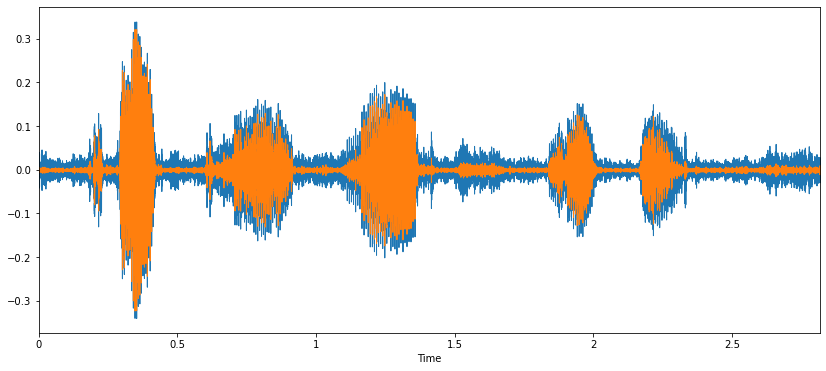

In [39]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');
librosa.display.waveplot(yw1,sr=sr, x_axis='time');

* 위너필터만 사용한 신호(yw1)의 주파수 스펙트럼

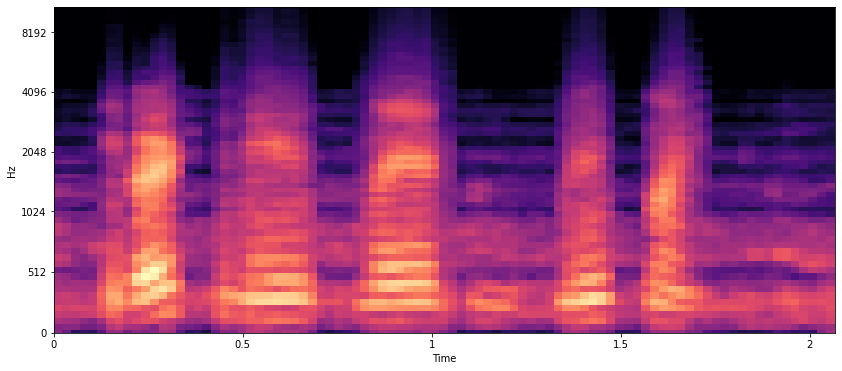

In [40]:
Sf1 = librosa.feature.melspectrogram(y=yw1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

* 원본신호와 위너필터후 밴드패스필터를 통과한 신호(ywb1)의 크기 비교

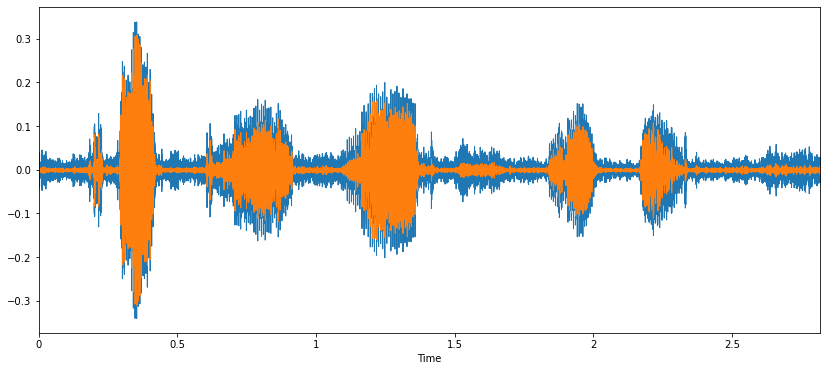

In [41]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');
librosa.display.waveplot(ywb1,sr=sr, x_axis='time');

* 위너필터후 밴드패스필터를 통과한 신호(ywb1)의 주파수 스펙트럼

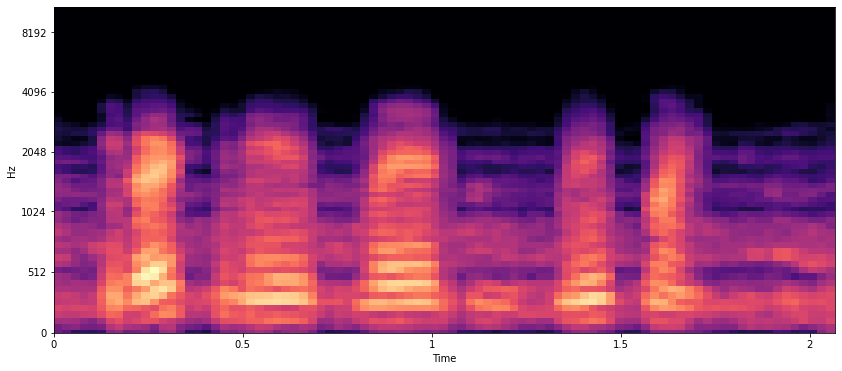

In [42]:
Sf1 = librosa.feature.melspectrogram(y=ywb1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

* 원본신호와 위너필터후 밴드패스필터후 주파수대역 일부 제거한 신호(ywbf1)의 크기 비교

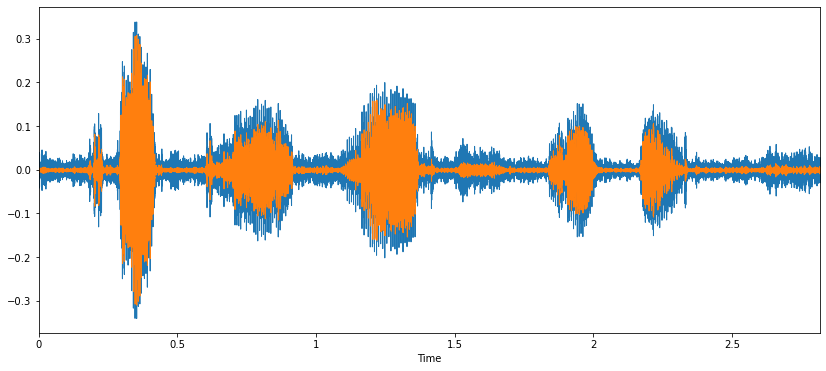

In [43]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');
librosa.display.waveplot(ywbf1,sr=sr, x_axis='time');

* 위너필터후 밴드패스필터후 주파수대역 일부 제거한 신호(ywbf1)의 주파수스펙트럼

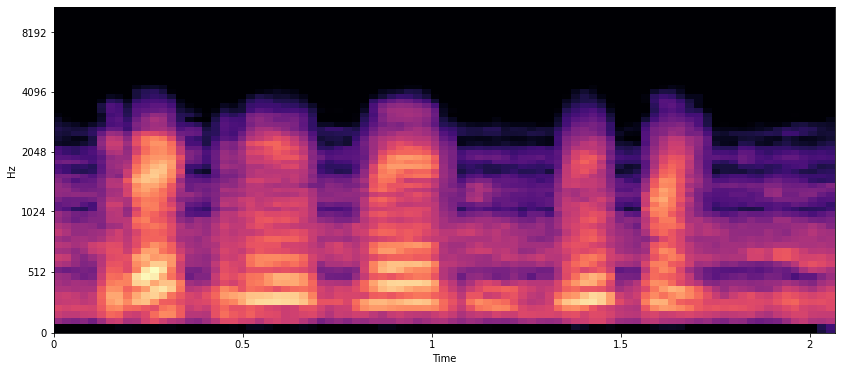

In [44]:
Sf1 = librosa.feature.melspectrogram(y=ywbf1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

* 원본신호와 위너필터후 밴드패스필터후 ann모델을 통과한 신호(ywba1)의 크기 비교

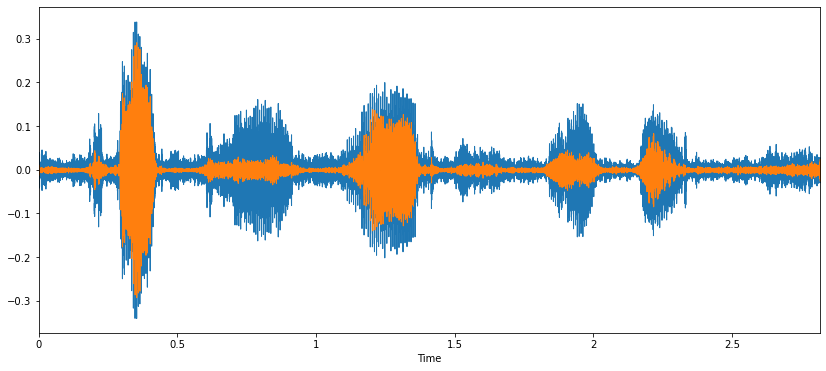

In [45]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');
librosa.display.waveplot(ywba1,sr=sr, x_axis='time');

위너필터후 밴드패스필터후 ann모델을 통과한 신호(ywba1)의 주파수 스펙트럼

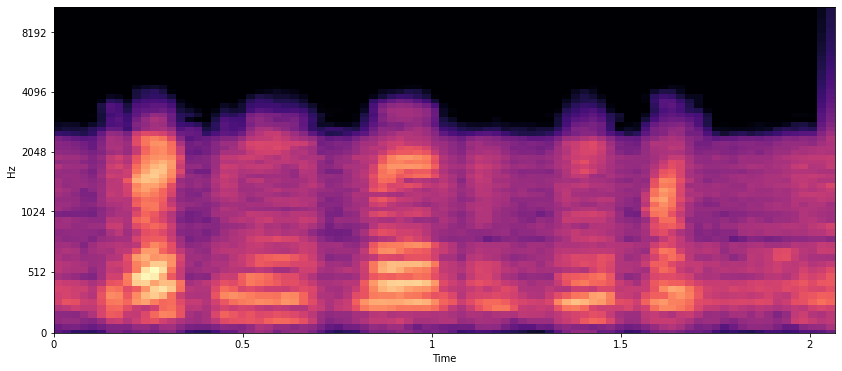

In [46]:
Sf1 = librosa.feature.melspectrogram(y=ywba1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

* 원본신호와 위너필터후 ann모델을 통과한 신호(ywa1)의 크기 비교

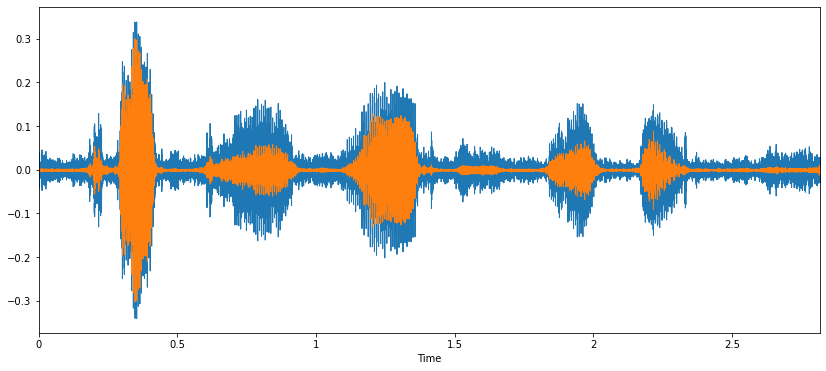

In [47]:
librosa.display.waveplot(y1,sr=sr, x_axis='time');
librosa.display.waveplot(ywa1,sr=sr, x_axis='time');

위너필터후 ann모델을 통과한 신호(ywa1)의 주파수 스펙트럼

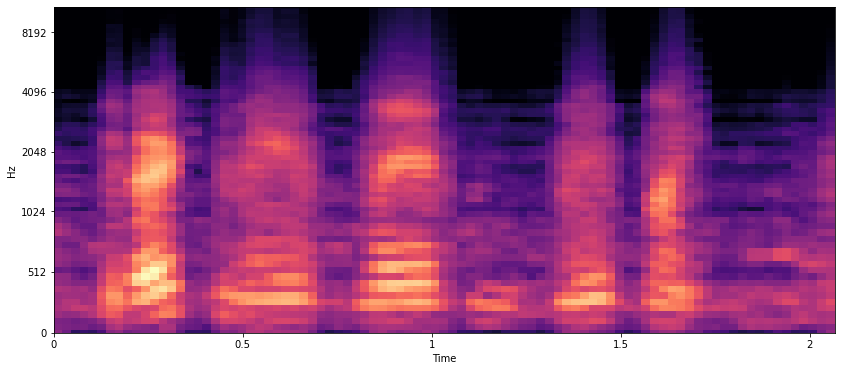

In [48]:
Sf1 = librosa.feature.melspectrogram(y=ywa1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

# **5.완성된 오디오파일 듣기 및 최종선정**
* 위너필터만 사용한 결과

In [49]:
display(Audio(yw1,rate=sr))

* 위너필터후 밴드패스필터 사용한 결과

In [50]:
display(Audio(ywb1,rate=sr))

* 위너필터후 밴드패스필터 통과시킨 후 주파수대역 차단한 결과

In [51]:
display(Audio(ywbf1,rate=sr))

* 위너필터후 밴드패스필터 통과시킨 후 ann모델 활용한 결과(선택)

In [52]:
display(Audio(ywba1,rate=sr))

* 위너필터후 ann모델 활용한 결과

In [53]:
display(Audio(ywa1,rate=sr))